# Tuning parameters for rocket methods
1. num_kernels

In [1]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import RidgeClassifier
from sktime.transformations.panel.rocket import Rocket
from sklearn.model_selection import cross_val_score, KFold
from itertools import product

from param import *
from datasets import ThresholdSegmentDataset

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

## Large Range

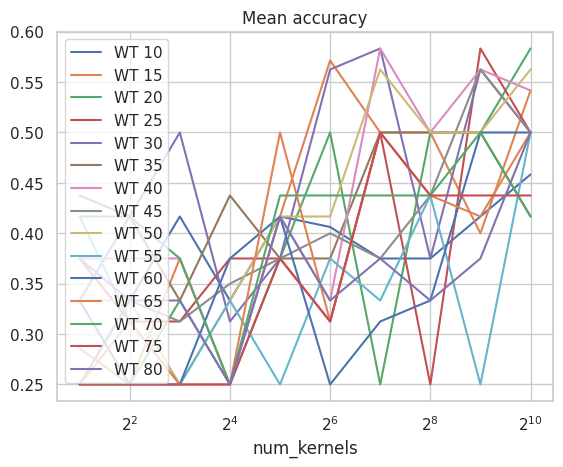

In [5]:
result_org = []
for data_dir in datalist:
    data_name = str(data_dir).split('/')[-1]
    with open(ParamDir().output_dir/data_name/(f"tsc_tuning_rocket_large_scale.pickle"),"rb") as f:
        result_all = pickle.load(f)
    for result in result_all:
        if "KO" in data_name:
            result_org.append((np.mean(result["scores"]), result["K"], result["num_kernels"], "KO"))
        else:
            result_org.append((np.mean(result["scores"]), result["K"], result["num_kernels"], "WT"))

df = pd.DataFrame(result_org, columns=["scores", "K", "num_kernels", "mouse_type"])

fig, ax = plt.subplots()
ax.set_xscale("log", base=2)
for K_values in df["K"].unique():
# df[df["K"]==K_values].groupby(["mouse_type", "num_kernels"])["scores"].median().loc["KO"].plot(ax=ax, label="KO")
    df[df["K"]==K_values].groupby(["mouse_type", "num_kernels"])["scores"].median().loc["WT"].plot(ax=ax, label=f"WT {K_values}")
ax.set_title("Mean accuracy")
plt.legend()


## Small Scale

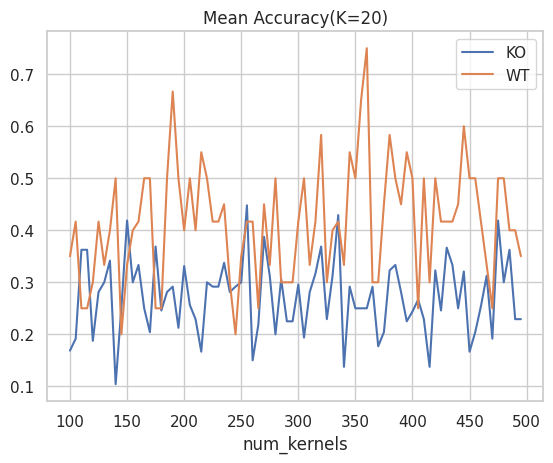

In [33]:
result_org = []
for data_dir in datalist[:7]:
    data_name = str(data_dir).split('/')[-1]
    with open(ParamDir().output_dir/data_name/(f"tsc_tuning_rocket_small_scale.pickle"),"rb") as f:
        result_all = pickle.load(f)
    
    for result in result_all:
        if "KO" in data_name:
            result_org.append((np.mean(result["scores"]), result["K"], result["num_kernels"], "KO"))
        else:
            result_org.append((np.mean(result["scores"]), result["K"], result["num_kernels"], "WT"))

df = pd.DataFrame(result_org, columns=["scores", "K", "num_kernels", "mouse_type"])

fig, ax = plt.subplots()
K_values = 20
df[df["K"]==K_values].groupby(["mouse_type", "num_kernels"])["scores"].median().loc["KO"].plot(ax=ax, label="KO")
df[df["K"]==K_values].groupby(["mouse_type", "num_kernels"])["scores"].median().loc["WT"].plot(ax=ax, label="WT")
ax.set_title("Mean Accuracy(K=20)")
plt.legend()

In [32]:
2**9

512

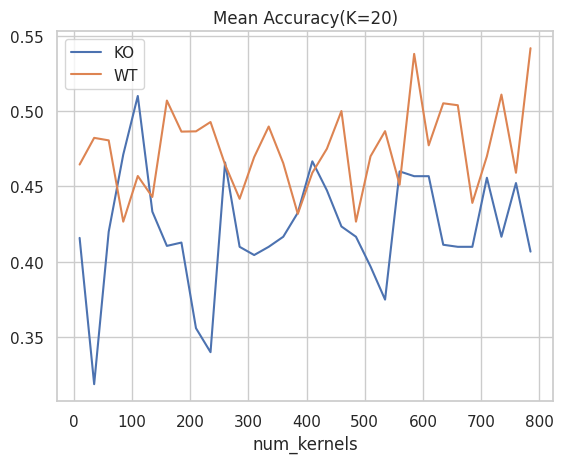

In [6]:
prep = []
for data_dir in datalist:
    data_name = str(data_dir).split('/')[-1]
    with open(ParamDir().output_dir/data_name/(f"tsc_tuning_rocket_small_scale_kernels.pickle"),"rb") as f:
        result_all = pickle.load(f)
    # result_org = []
    for result in result_all:
        if "KO" in data_name:
            prep.append((np.mean(result["scores"]), result["K"], result["num_kernels"], "KO"))
        else:
            prep.append((np.mean(result["scores"]), result["K"], result["num_kernels"], "WT"))

df = pd.DataFrame(prep, columns=["scores", "K", "num_kernels", "mouse_type"])

fig, ax = plt.subplots()
df[df["K"]==20].groupby(["mouse_type", "num_kernels"])["scores"].median().loc["KO"].plot(ax=ax, label="KO")
df[df["K"]==20].groupby(["mouse_type", "num_kernels"])["scores"].median().loc["WT"].plot(ax=ax, label="WT")
ax.set_title("Mean Accuracy(K=20)")
plt.legend()